# 회귀

---

- Linear Regression: 예측값과 실제값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제(Regularization)를 적용하지 않은 모델
 
 
- Ridge : 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델이다. 릿지 회귀는 L2규제를 적용하는데, L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델이다.


- Lasso : 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식이다. L2 규제가 회귀 계수 값의 크기를 줄이는 데 반해, L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것이다. 이러한 특성 때문에 L1규제는 피처 선택 기능으로도 불린다.


- ElasticNet : L2, L1 규제를 함께 결합한 모델이다. 주로 피처가 많은 데이터 세트에서 적용되며, L1 규제로 피처의 개수를 줄임과 동시에 L2규제로 계수 값의 크기를 조정한다.


- Logistic Regression : 분류에 사용되는 선형모델이다.

## 평가지표

- MAE : Mean Absolute Error(MAE)이며, 실제 값과 예측값의 차이를 절대값으로 변환해 평균한 것


- MSE : Mean Squared Error(MSE)이며, 실제 값과 예측값의 차이를 제곱하여 평균한 것


- RSME : Root Mean Squred Error(RMSE)이며, MSE 값은 오류의 제곱을 구하기 때문에, 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌워 구하는 방식


- $R^2$ : 분산 기반으로 평가하는 예측 방법. 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하여, 1에 가까울수록 예측 정확도가 높음

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
boston=load_boston()

boston_df=pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['Price']=boston.target
print('Boston 데이터 세트 크기 : ',boston_df.shape)

boston_df.head()

Boston 데이터 세트 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
boston_df.isnull().sum()/len(boston_df)

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
Price      0.0
dtype: float64

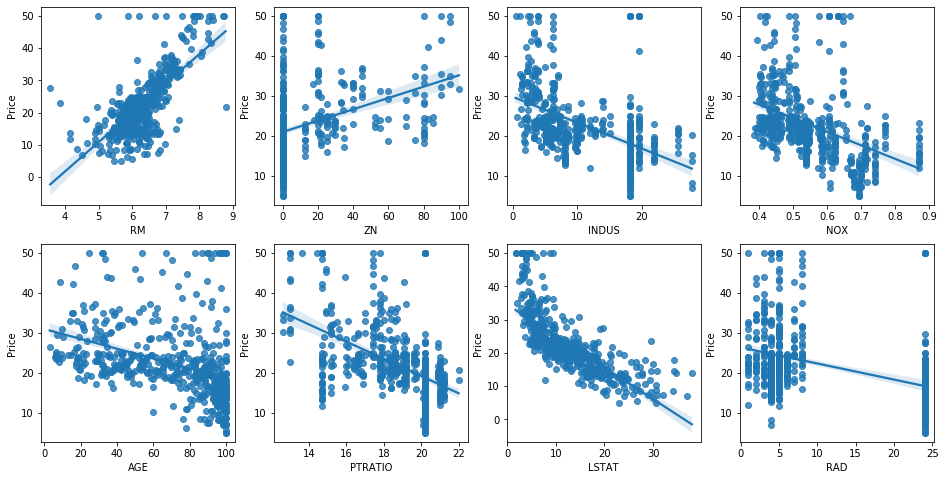

In [8]:
fig, axes=plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

for i, feature in enumerate(lm_features):
    row=int(i/4)
    col=i%4
    
    sns.regplot(x=feature, y='Price', data=boston_df, ax=axes[row][col])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X=boston_df.drop('Price', axis=1)
y=boston_df['Price']

In [18]:
x_train ,x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
lr_reg=LinearRegression()

lr_reg.fit(x_train, y_train)

y_pred=lr_reg.predict(x_test)

In [20]:
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)

r2=r2_score(y_test, y_pred)

print('MSE : {0:.3f}  ,  RMSE : {1:.3f}'.format(mse, rmse))
print('Variance Score(R2) : {0:.3f}'.format(r2))

MSE : 27.196  ,  RMSE : 5.215
Variance Score(R2) : 0.673


In [22]:
print('절편 값 : ',lr_reg.intercept_)
print('회귀 계수 값 : ',lr_reg.coef_)

절편 값 :  37.937107741833316
회귀 계수 값 :  [-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
 -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
  2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
 -4.86738066e-01]


#### 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성

In [25]:
coeff=pd.Series(data=np.round(lr_reg.coef_, 1), index=X.columns)
coeff.sort_values(ascending=False)

RM          3.9
CHAS        2.5
RAD         0.2
ZN          0.0
INDUS       0.0
AGE        -0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -1.0
DIS        -1.5
NOX       -16.2
dtype: float64

In [26]:
# cv

from sklearn.model_selection import cross_val_score

X=boston_df.drop('Price', axis=1)
y=boston_df['Price']

lr_reg=LinearRegression()

In [30]:
neg_mse_scores=cross_val_score(lr_reg, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

In [28]:
print('5 folds 의 개별 Negative MSE scores : ',np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores : ',np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE : 5.829
